In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [196]:
df = pd.read_csv("export_dataframe limpia.csv", encoding="ISO-8859-1",index_col=0,header=0)

In [197]:
df.head()

LONGITUD   LATITUD  DBO_mg/L  CALIDAD_DBO  DQO_mg/L  CALIDAD_DQO  \
0 -102.33911  22.24730       6.0            2     54.08            4   
1 -109.84290  22.90473       NaN            0       NaN            0   
2 -109.86442  22.89880       NaN            0       NaN            0   
3 -109.88604  22.89609       NaN            0       NaN            0   
4 -109.89657  22.87694       NaN            0       NaN            0   

   SST_mg/L  CALIDAD_SST  COLI_FEC_NMP_100mL  CALIDAD_COLI_FEC  ...  SEMAFORO  \
0   13.7500            1              1162.0                 4  ...       3.0   
1    9.0000            1                 NaN                 0  ...       1.0   
2    9.0000            1                 NaN                 0  ...       1.0   
3   13.9667            1                 NaN                 0  ...       1.0   
4    9.0000            1                 NaN                 0  ...       1.0   

   CUMPLE_CON_DBO  CUMPLE_CON_DQO  CUMPLE_CON_SST  CUMPLE_CON_CF  \
0             1.0             0.0             1.0            0.0   
1             NaN             NaN             1.0            NaN   
2             NaN             NaN             1.0            NaN   
3             NaN             NaN             1.0            NaN   
4             NaN             NaN             1.0            NaN   

   CUMPLE_CON_E_COLI  CUMPLE_CON_ENTEROC  CUMPLE_CON_OD  CUMPLE_CON_TOX  \
0                1.0                 NaN            1.0             1.0   
1                NaN                 1.0            1.0             1.0   
2                NaN                 1.0            1.0             1.0   
3                NaN                 1.0            1.0             1.0   
4                NaN                 1.0            1.0             1.0   

     GRUPO  
0  LENTICO  
1  COSTERO  
2  COSTERO  
3  COSTERO  
4  COSTERO  

[5 rows x 40 columns]

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LONGITUD                3493 non-null   float64
 1   LATITUD                 3493 non-null   float64
 2   DBO_mg/L                2581 non-null   float64
 3   CALIDAD_DBO             3493 non-null   int64  
 4   DQO_mg/L                2581 non-null   float64
 5   CALIDAD_DQO             3493 non-null   int64  
 6   SST_mg/L                3489 non-null   float64
 7   CALIDAD_SST             3493 non-null   int64  
 8   COLI_FEC_NMP_100mL      2582 non-null   float64
 9   CALIDAD_COLI_FEC        3493 non-null   int64  
 10  E_COLI_NMP_100mL        2582 non-null   float64
 11  CALIDAD_E_COLI          3493 non-null   int64  
 12  ENTEROC_NMP_100mL       904 non-null    float64
 13  CALIDAD_ENTEROC         3493 non-null   int64  
 14  OD_PORC                 1797 non-null   

In [199]:
df.columns
Columns= ['LONGITUD', 'LATITUD', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L',
       'CALIDAD_DQO', 'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL',
       'CALIDAD_COLI_FEC', 'E_COLI_NMP_100mL', 'CALIDAD_E_COLI',
       'ENTEROC_NMP_100mL', 'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC',
       'OD_PORC_SUP', 'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED',
       'CALIDAD_OD_PORC_MED', 'OD_PORC_FON', 'CALIDAD_OD_PORC_FON',
       'TOX_D_48_UT', 'CALIDAD_TOX_D_48', 'TOX_V_15_UT', 'CALIDAD_TOX_V_15',
       'TOX_D_48_SUP_UT', 'CALIDAD TOX_D_48_SUP', 'TOX_FIS_SUP_15_UT',
       'CALIDAD_TOX_FIS_SUP_15', 'SEMAFORO', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUMPLE_CON_TOX']

In [200]:
for name   in Columns:
    df[name].fillna(value = df[name].median(),inplace = True)


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LONGITUD                3493 non-null   float64
 1   LATITUD                 3493 non-null   float64
 2   DBO_mg/L                3493 non-null   float64
 3   CALIDAD_DBO             3493 non-null   int64  
 4   DQO_mg/L                3493 non-null   float64
 5   CALIDAD_DQO             3493 non-null   int64  
 6   SST_mg/L                3493 non-null   float64
 7   CALIDAD_SST             3493 non-null   int64  
 8   COLI_FEC_NMP_100mL      3493 non-null   float64
 9   CALIDAD_COLI_FEC        3493 non-null   int64  
 10  E_COLI_NMP_100mL        3493 non-null   float64
 11  CALIDAD_E_COLI          3493 non-null   int64  
 12  ENTEROC_NMP_100mL       3493 non-null   float64
 13  CALIDAD_ENTEROC         3493 non-null   int64  
 14  OD_PORC                 3493 non-null   

### Definicion de metricas custom made
Debido a que en Y tenemos 3 Salidas no 1 como estamos acostumbrados

In [202]:
def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3

  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)


def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3

  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  result = (vp)/(vp+fp+np.finfo(np.float32).eps)
  return result

def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3

  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp)/(vp+fn+np.finfo(np.float32).eps)

def mi_gmean(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3

    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3

    recall = vp / (vp+fn+np.finfo(np.float32).eps)
    especificidad = vn / (vn+fp+np.finfo(np.float32).eps)
    gmean = np.sqrt(recall * especificidad)

    return gmean

def mi_f1score(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3

    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3

    return (2*vp)/((2*vp)+fp+fn+np.finfo(np.float32).eps)


my_accuracy = make_scorer(mi_accuracy)
my_precision = make_scorer(mi_precision)
my_recall = make_scorer(mi_recall)
my_f1score = make_scorer(mi_f1score)
my_gmean = make_scorer(mi_gmean)

mismetricas = {"Accuracy":my_accuracy,"Precision":my_precision,"Recall":my_recall,"F1Score":my_f1score,"Gmean":my_gmean}

In [203]:
df.shape

(3493, 40)

In [204]:
X = df.loc[:,df.columns!="SEMAFORO"]

#Determinamos las columnas que contendrá el eje y
y = df["SEMAFORO"].copy()

#creamos nuestros datos de validación con la función trains_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

print("Tamaño del conjunto de dato x_train: ", X_train.shape)
print("Tamaño del conjunto de dato X_test: ", X_test.shape)

Tamaño del conjunto de dato x_train:  (2794, 39)
Tamaño del conjunto de dato X_test:  (699, 39)


In [205]:
print(X)

       LONGITUD   LATITUD  DBO_mg/L  CALIDAD_DBO  DQO_mg/L  CALIDAD_DQO  \
0    -102.33911  22.24730      6.00            2     54.08            4   
1    -109.84290  22.90473      2.63            0     27.01            0   
2    -109.86442  22.89880      2.63            0     27.01            0   
3    -109.88604  22.89609      2.63            0     27.01            0   
4    -109.89657  22.87694      2.63            0     27.01            0   
...         ...       ...       ...          ...       ...          ...   
3488  -99.42142  26.78971      1.00            1      9.00            1   
3489  -99.53064  27.43714     39.09            4    115.88            4   
3490  -99.50727  27.49901      4.40            2     87.64            4   
3491  -99.52221  27.49631      1.00            1     35.92            3   
3492  -99.52572  27.51697      1.00            1     34.60            3   

      SST_mg/L  CALIDAD_SST  COLI_FEC_NMP_100mL  CALIDAD_COLI_FEC  ...  \
0      13.7500           

In [206]:
NumericasQuimicas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']

OrdinalesQuimicas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']

CategoricasQuimicas = ['ESTADO','MUNICIPIO','TIPO','SUBTIPO']


C:\Users\oviwa\AppData\Local\Temp\ipykernel_45484\1406022942.py:20: RuntimeWarning: divide by zero encountered in log
  Transf2 = np.log(Transf0)


ValueError: supplied range of [-inf, 3.1759265693317715] is not finite

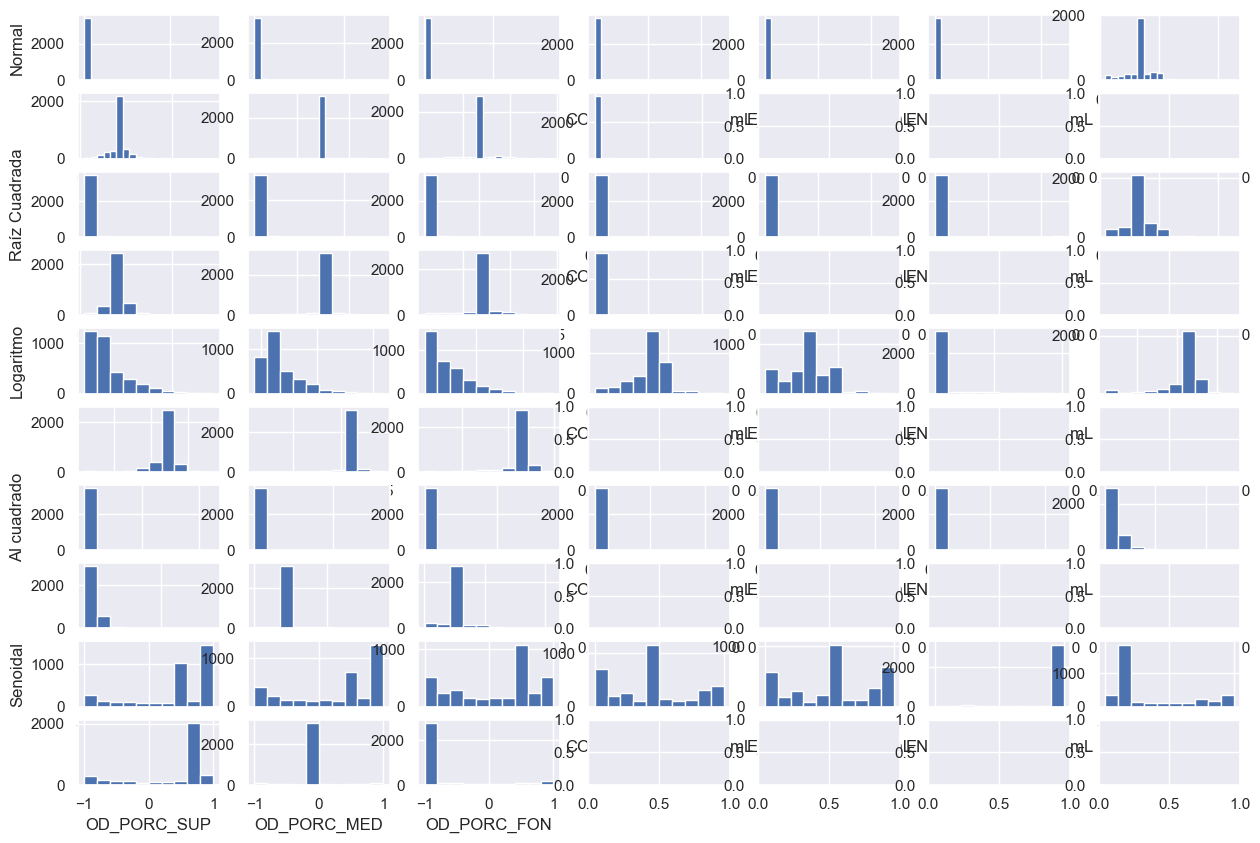

In [207]:
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(10, 7)
for k in range(0,14):
  plt.subplot(10,7,k+1)

  Transf0 = df[NumericasQuimicas].iloc[:,k].to_numpy().reshape(-1, 1)
  plt.hist(Transf0, bins=20)
  plt.xlabel(NumericasQuimicas[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(10,7,k+15)
  Transf1 = Transf0**1/2
  plt.hist(Transf1)
  plt.xlabel(NumericasQuimicas[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(10,7,k+29)
  Transf2 = np.log(Transf0)
  plt.hist(Transf2)
  plt.xlabel(NumericasQuimicas[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(10,7,k+43)
  Transf3 = Transf0**2
  plt.hist(Transf3)
  plt.xlabel(NumericasQuimicas[k])
  if k==0:
    plt.ylabel('Al cuadrado')

  plt.subplot(10,7,k+57)
  Transf4 = np.sin(Transf0)
  plt.hist(Transf4)
  plt.xlabel(NumericasQuimicas[k])
  if k==0:
    plt.ylabel('Senoidal')

plt.show()

In [208]:
numericas_pipeline = Pipeline(steps = [('Escalar', MinMaxScaler(feature_range=(1,3))) ,
                                         ('Logaritmo', FunctionTransformer(np.log))])
numericas_nombres = NumericasQuimicas


ordinales_pipeline = Pipeline(steps = [ ('OHE', OneHotEncoder(handle_unknown='ignore'))])

ordinales_nombres = OrdinalesQuimicas




CT = ColumnTransformer(transformers = [('numerica', numericas_pipeline, numericas_nombres),
                                        ('ordinal', ordinales_pipeline,ordinales_nombres),
                                                       ],  remainder='drop')

In [209]:
modeloDT = DecisionTreeClassifier(random_state = 42)

dicc_gridDT = {'m__ccp_alpha':np.linspace(0,1,10),
              'm__criterion':['gini','entropy','log_loss'],
              'm__max_depth':[1,8,15,20,None],
              'm__min_samples_split':[2,5,10,15],
              'm__class_weight':['balanced',None],
                           }

pipeline = Pipeline(steps=[('ct',CT),('m',modeloDT)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)


gridDT = GridSearchCV(estimator=pipeline,
                    param_grid=dicc_gridDT,
                    cv=cv,
                    scoring= make_scorer(mi_gmean),
                    n_jobs=-1)


gridDT.fit(X_train, y_train)
gridDT.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridDT.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT.best_params_)
print('Métrica utilizada:', gridDT.scoring)

Mejor valor obtenido con la mejor combinación: 0.9977626807632362
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.0, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 15, 'm__min_samples_split': 10}
Métrica utilizada: make_scorer(mi_gmean)


In [210]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),
                                    class_weight=gridDT.best_params_.get('m__class_weight'),
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados = list()
pipeline = Pipeline(steps=[('ct',CT),('m',modeloDT_Optimizado)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)



scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados.append(scores)

print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train F1score: %.3f (%.4f)\nmean Test F1score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados[0]['train_Accuracy']),
                                                                                                 np.std(resultados[0]['train_Accuracy']),
                                                                                                 np.mean(resultados[0]['test_Accuracy']),
                                                                                                 np.std(resultados[0]['test_Accuracy']),
                                                                                                 np.mean(resultados[0]['train_Precision']),
                                                                                                 np.std(resultados[0]['train_Precision']),
                                                                                                 np.mean(resultados[0]['test_Precision']),
                                                                                                 np.std(resultados[0]['test_Precision']),
                                                                                                 np.mean(resultados[0]['train_Recall']),
                                                                                                 np.std(resultados[0]['train_Recall']),
                                                                                                 np.mean(resultados[0]['test_Recall']),
                                                                                                 np.std(resultados[0]['test_Recall']),
                                                                                                 np.mean(resultados[0]['train_Gmean']),
                                                                                                 np.std(resultados[0]['train_Gmean']),
                                                                                                 np.mean(resultados[0]['test_Gmean']),
                                                                                                 np.std(resultados[0]['test_Gmean']),
                                                                                                 np.mean(resultados[0]['train_F1Score']),
                                                                                                 np.std(resultados[0]['train_F1Score']),
                                                                                                 np.mean(resultados[0]['test_F1Score']),
                                                                                                 np.std(resultados[0]['test_F1Score']),
                                                                                                  ))


mean Train Accuracy: 1.000 (0.0001)
mean Test Accuracy: 0.998 (0.0012)

mean Train Precision: 1.000 (0.0002)
mean Test Precision: 0.997 (0.0018)

mean Train Recall: 1.000 (0.0002)
mean Test Recall: 0.997 (0.0018)

mean Train Gmean: 1.000 (0.0002)
mean Test Gmean: 0.998 (0.0014)

mean Train F1score: 1.000 (0.0002)
mean Test F1score: 0.997 (0.0018)



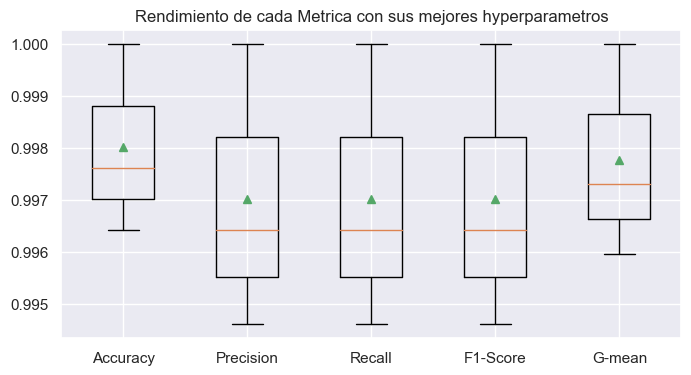

In [211]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score','G-mean']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score','test_Gmean']
bpGmean = list()
for i in range(0,len(lista_metrica)):
  rr = resultados[0][lista_metrica[i]]
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()

In [212]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, score_type):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)


    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')

    plt.plot(train_sizes, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')

    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()

def mi_ModeloYCurvasDT(Xin):


    modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),
                                    class_weight=gridDT.best_params_.get('m__class_weight'),
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',CT),('m',modeloDT_Optimizado)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)


    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)

    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")

Curvas de aprendizaje del modelo Decision Tree:


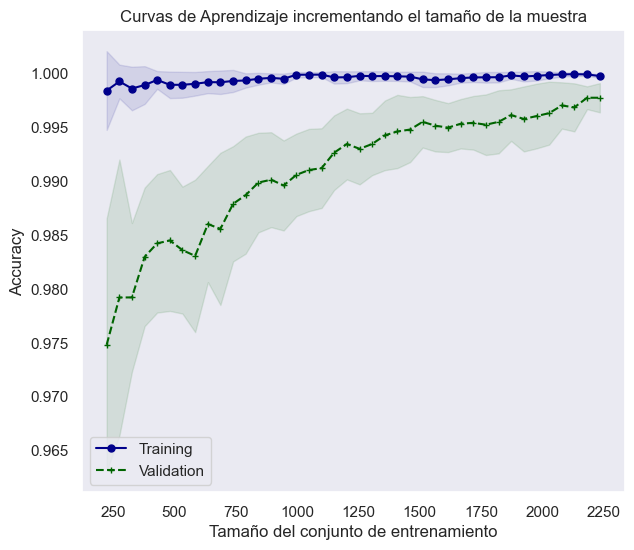

In [213]:
print('Curvas de aprendizaje del modelo Decision Tree:')
mi_ModeloYCurvasDT(X_train)

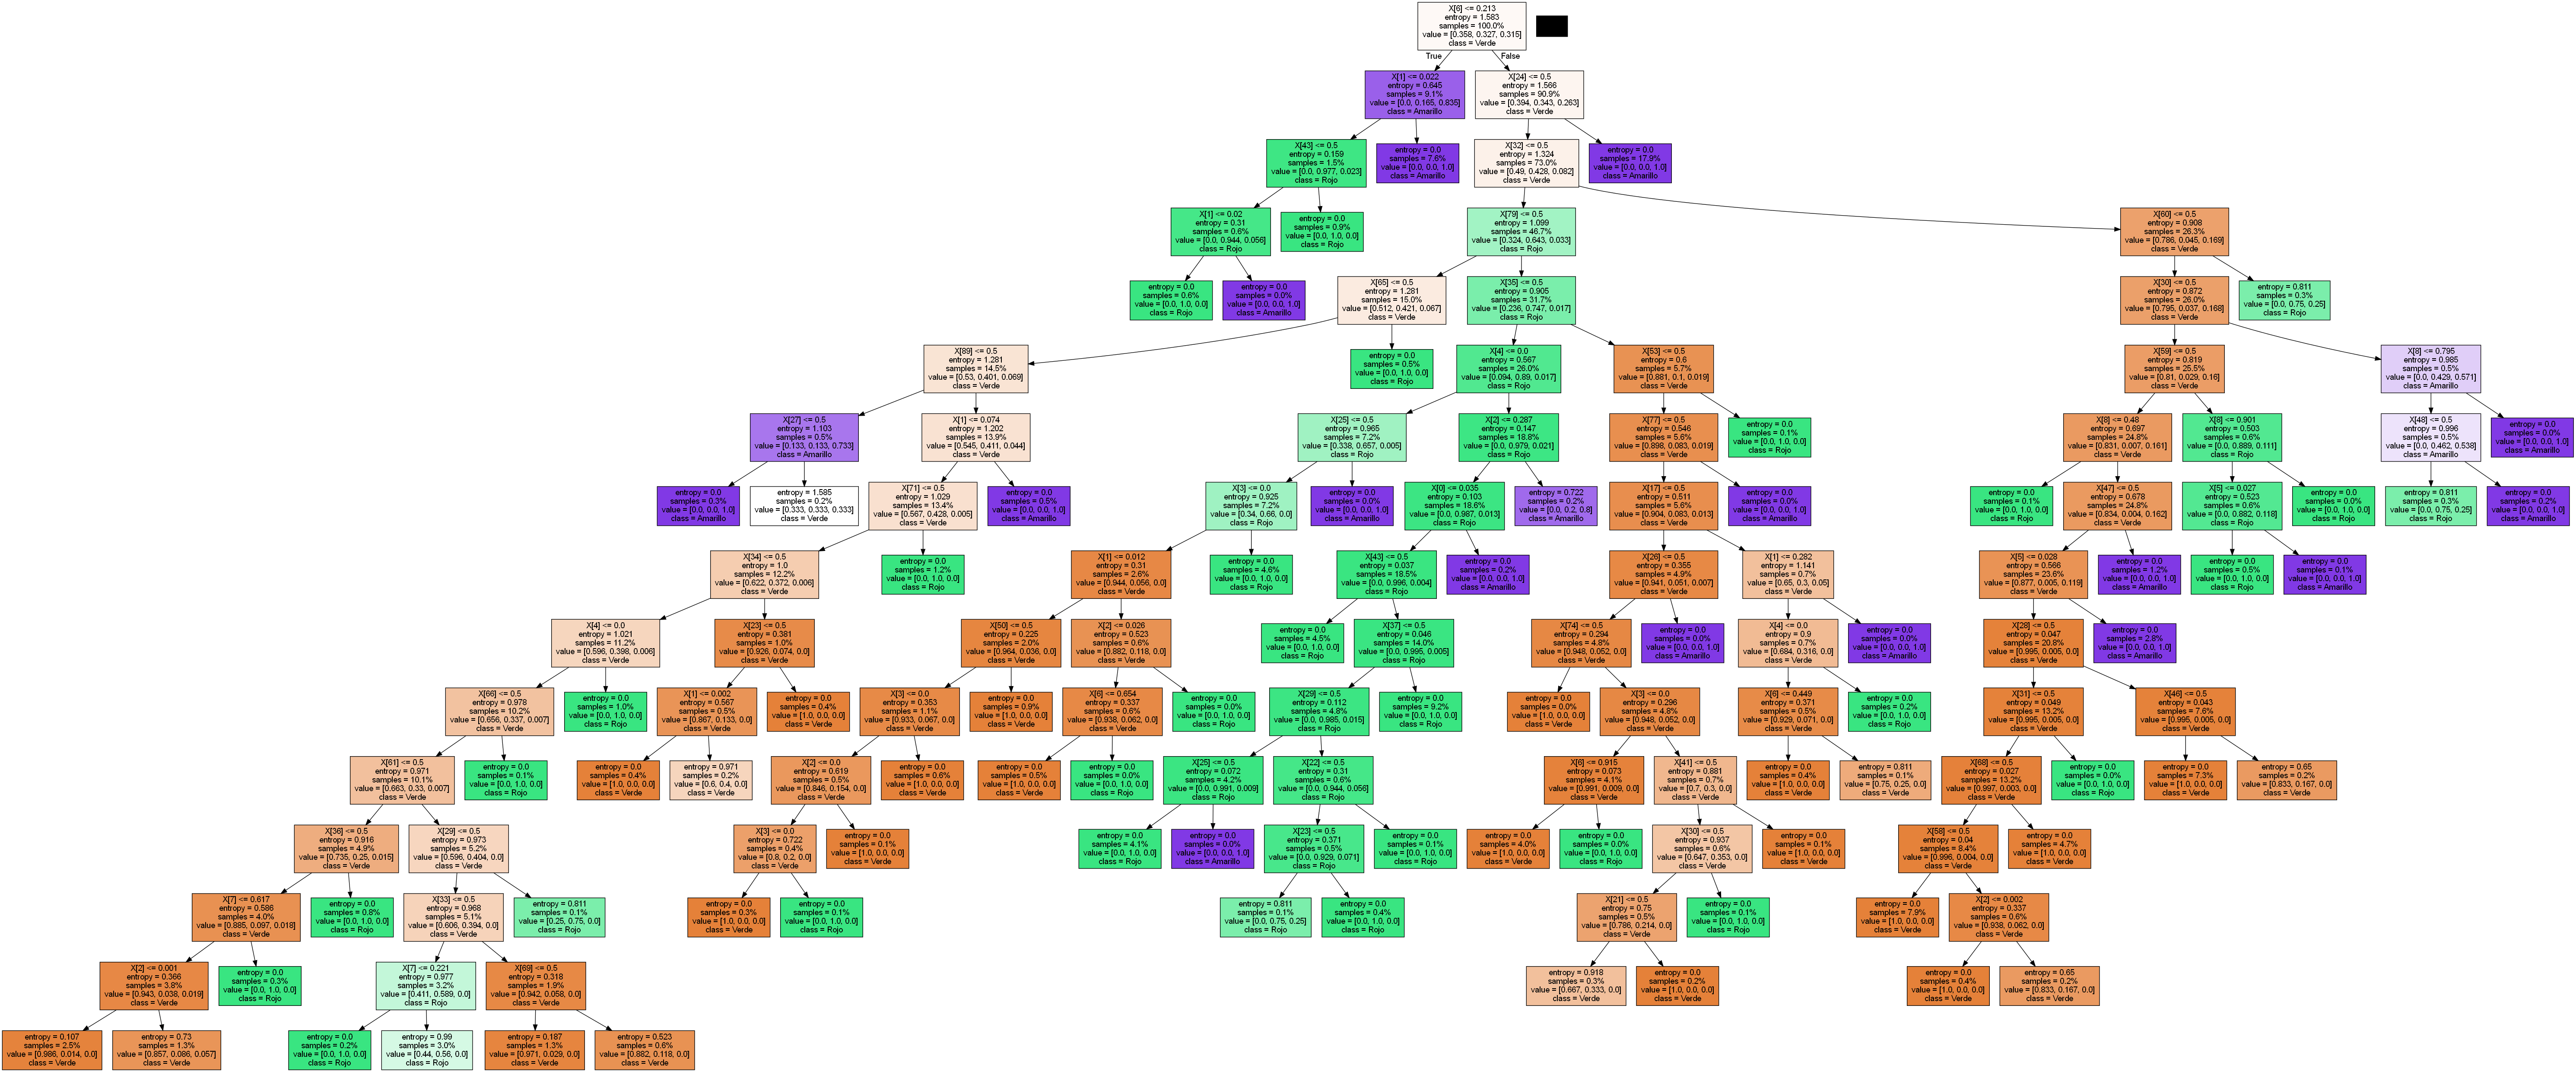

In [214]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),
                                    class_weight=gridDT.best_params_.get('m__class_weight'),
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42,
                                    max_features = 'sqrt')
Xct = CT.fit(X_train)
Xxt = Xct.transform(X_train)
modeloDT_Optimizado.fit(Xxt, y_train)


dot_data = tree.export_graphviz(decision_tree=modeloDT_Optimizado,
                                out_file=None,
                                max_depth=gridDT.best_params_.get('m__max_depth'),

                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

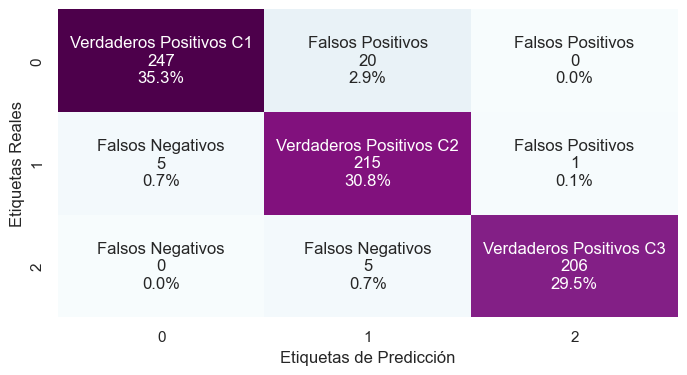

In [215]:
pipeline = Pipeline(steps=[('ct',CT),('m',modeloDT_Optimizado)])

pipeline.fit(X_train, y_train)

yhat = pipeline.predict(X_test)

cm = confusion_matrix(y_test, yhat)

txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
       'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
       'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='BuPu', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

In [216]:
y_test

1109    3.0
2971    1.0
764     3.0
196     2.0
3202    1.0
       ... 
1446    1.0
1626    3.0
531     2.0
2294    1.0
1535    2.0
Name: SEMAFORO, Length: 699, dtype: float64

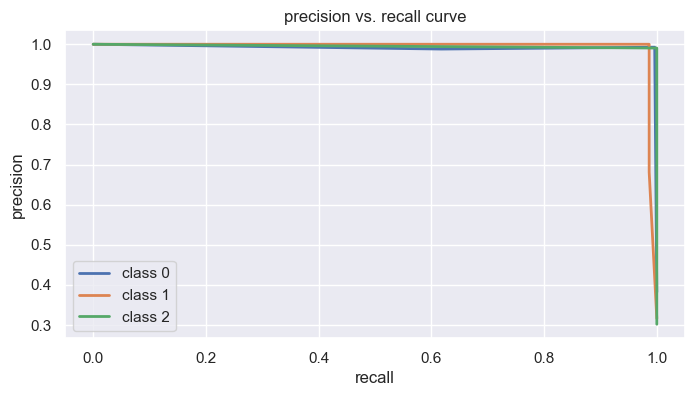

In [217]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),
                                    class_weight=gridDT.best_params_.get('m__class_weight'),
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline = Pipeline(steps=[('ct',CT),('m',modeloDT_Optimizado)])

pipeline.fit(X_train, y_train)

lr_probs = pipeline.predict_proba(X_test)


y_test_p =y_test.copy()
my_vals = y_test.unique().tolist()
my_vals.sort()


y_test = label_binarize(y_test, classes=my_vals)
n_classes = y_test.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], lr_probs[:, i])
  average_precision[i] = average_precision_score(y_test[:, i], lr_probs[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

### Random Forest


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)
modeloRFC = RandomForestClassifier(random_state = 0)

In [222]:
dicc_gridRFC = {'m2__ccp_alpha':np.linspace(0,1,10),
              'm2__criterion':['gini','entropy','log_loss'],
              'm2__max_depth':[1,8,15,20],
              'm2__min_samples_split':[2,5,10],
              'm2__class_weight':['balanced'],
                           }


pipeline2 = Pipeline(steps=[('ct',CT),('m2',modeloRFC)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)


gridRFC = GridSearchCV(estimator=pipeline2,
                    param_grid=dicc_gridRFC,
                    cv=cv,
                    scoring= make_scorer(mi_gmean),
                    n_jobs=-1)


gridRFC.fit(X_train, np.ravel(y_train))
gridRFC.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridRFC.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridRFC.best_params_)
print('Métrica utilizada:', gridRFC.scoring)

Mejor valor obtenido con la mejor combinación: 0.991047355306906
Mejor combinación de valores encontrados de los hiperparámetros: {'m2__ccp_alpha': 0.0, 'm2__class_weight': 'balanced', 'm2__criterion': 'gini', 'm2__max_depth': 15, 'm2__min_samples_split': 5}
Métrica utilizada: make_scorer(mi_gmean)


In [227]:
modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                   #min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                   max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados1 = list()
pipeline2a = Pipeline(steps=[('ct',CT),('m2',modeloRFC_Optimizado)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

#scores = cross_validate(pipeline2a, X_train, np.ravel(y_train), scoring=mismetricas, cv=cv, return_train_score=True)
scores = cross_validate(pipeline2a, X_train, y_train, scoring=mismetricas, cv=cv, return_train_score=True)


resultados1.append(scores)
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados1[0]['train_Accuracy']),
                                                                                                 np.std(resultados1[0]['train_Accuracy']),
                                                                                                 np.mean(resultados1[0]['test_Accuracy']),
                                                                                                 np.std(resultados1[0]['test_Accuracy']),
                                                                                                 np.mean(resultados1[0]['train_Precision']),
                                                                                                 np.std(resultados1[0]['train_Precision']),
                                                                                                 np.mean(resultados1[0]['test_Precision']),
                                                                                                 np.std(resultados1[0]['test_Precision']),
                                                                                                 np.mean(resultados1[0]['train_Recall']),
                                                                                                 np.std(resultados1[0]['train_Recall']),
                                                                                                 np.mean(resultados1[0]['test_Recall']),
                                                                                                 np.std(resultados1[0]['test_Recall']),
                                                                                                 np.mean(resultados1[0]['train_Gmean']),
                                                                                                 np.std(resultados1[0]['train_Gmean']),
                                                                                                 np.mean(resultados1[0]['test_Gmean']),
                                                                                                 np.std(resultados1[0]['test_Gmean']),
                                                                                                 np.mean(resultados1[0]['train_F1Score']),
                                                                                                 np.std(resultados1[0]['train_F1Score']),
                                                                                                 np.mean(resultados1[0]['test_F1Score']),
                                                                                                 np.std(resultados1[0]['test_F1Score']),
                                                                                                  ))


mean Train Accuracy: 1.000 (0.0000)
mean Test Accuracy: 0.992 (0.0022)

mean Train Precision: 1.000 (0.0000)
mean Test Precision: 0.988 (0.0033)

mean Train Recall: 1.000 (0.0000)
mean Test Recall: 0.988 (0.0033)

mean Train Gmean: 1.000 (0.0000)
mean Test Gmean: 0.991 (0.0025)

mean Train f1-score: 1.000 (0.0000)
mean Test f1-score: 0.988 (0.0033)



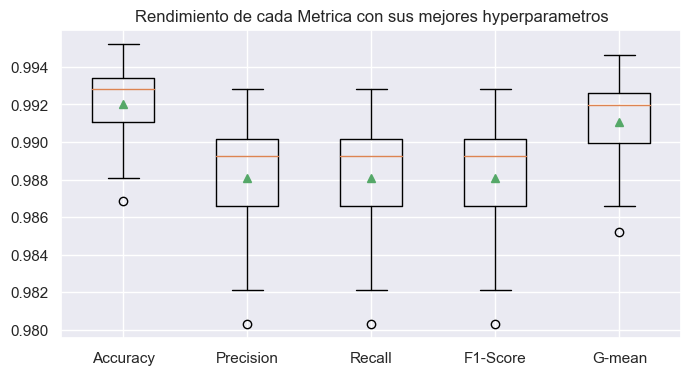

In [228]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score','G-mean']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score','test_Gmean']
bpGmean2 = list()
for i in range(0,len(lista_metrica)):
  rr = resultados1[0][lista_metrica[i]]
  bpGmean2.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean2, labels = nombres, showmeans=True)
plt.show()

In [229]:
def mi_ModeloYCurvasRFC(Xin):


    modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

    pipeline2b = Pipeline(steps=[('ct',CT),('m2',modeloRFC_Optimizado)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)


    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline2b ,
                                                        X = Xin,
                                                        y = np.ravel(y_train),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)

    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")

Curvas de aprendizaje del modelo Random Forest para Aguas Superficiales:


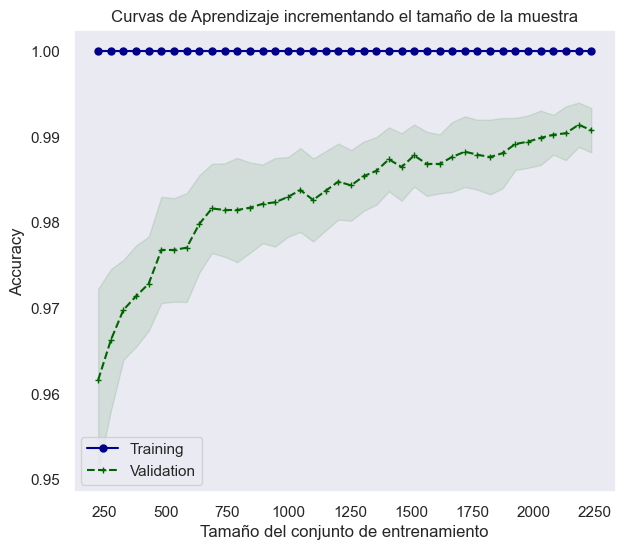

In [230]:
print('Curvas de aprendizaje del modelo Random Forest para Aguas Superficiales:')
mi_ModeloYCurvasRFC(X_train)

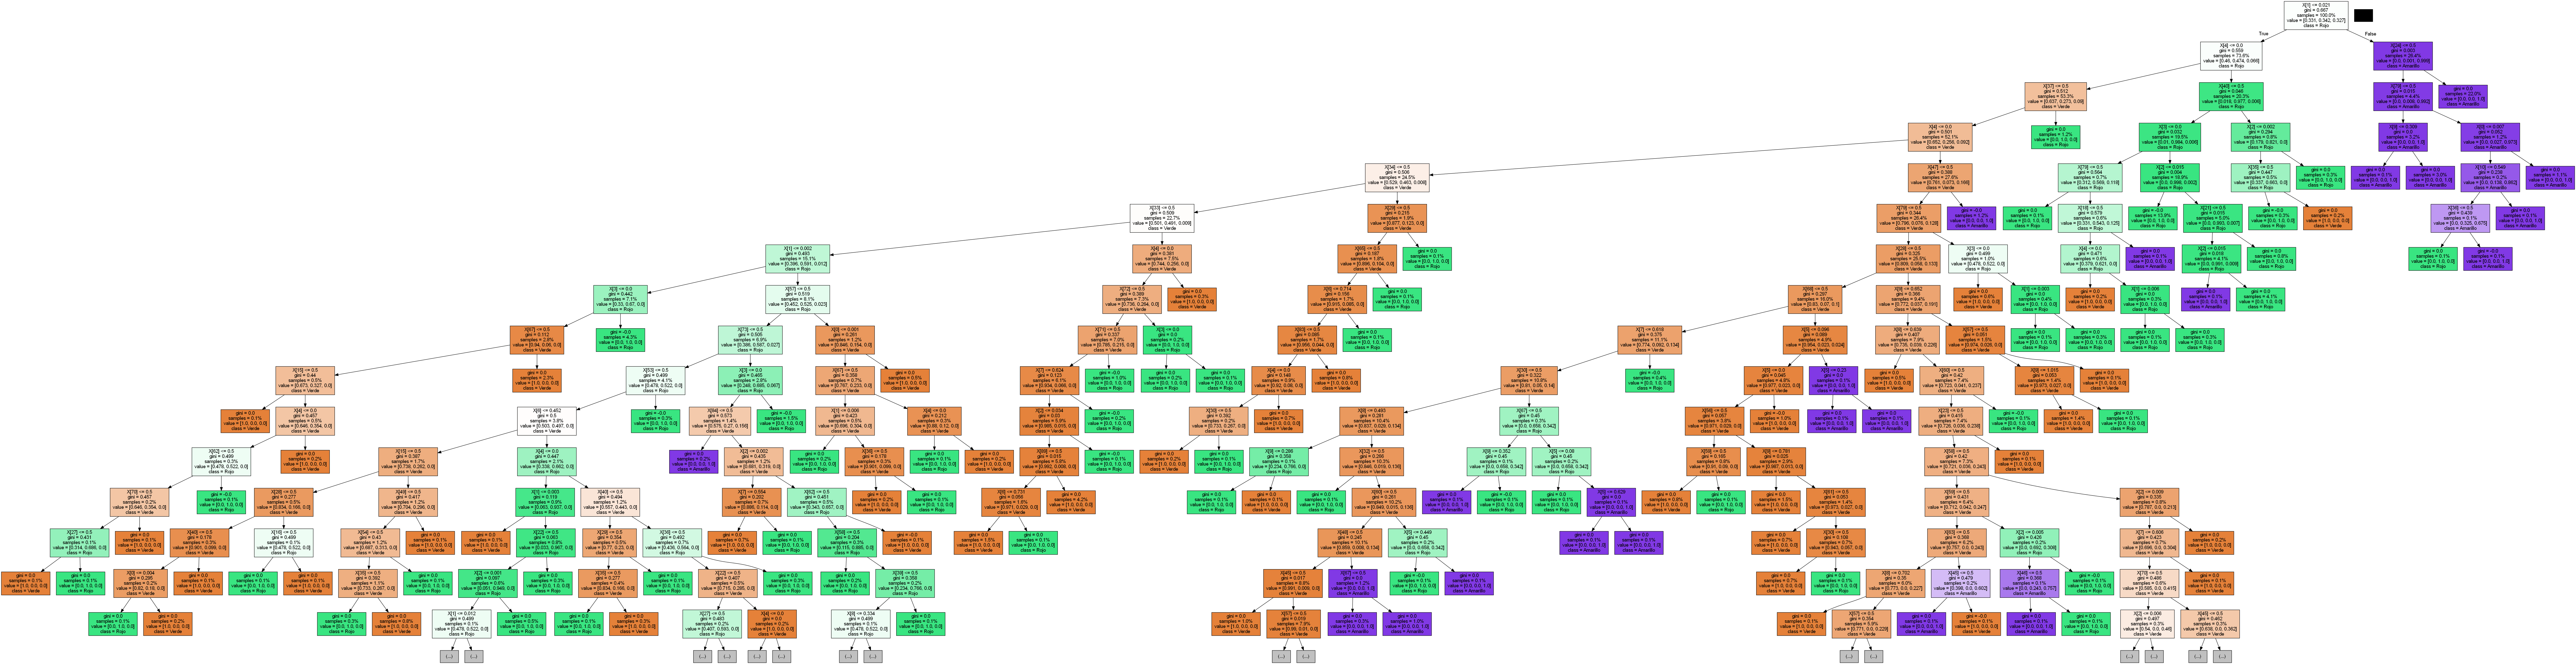

In [231]:
modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)


Z=np.ravel(y_train)
Xct1 = CT.fit(X_train)
Xxt1 = Xct1.transform(X_train)
modeloRFC_Optimizado.fit(Xxt1, Z)
estimator = modeloRFC_Optimizado.estimators_[10]



dot_data2 = tree.export_graphviz(estimator,
                                out_file=None,
                                max_depth=gridRFC.best_params_.get('m2__max_depth'),

                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())

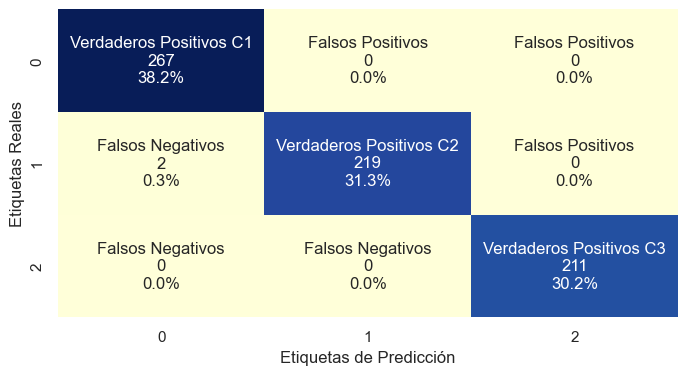

In [232]:
pipeline2z = Pipeline(steps=[('ct',CT),('m2',modeloRFC_Optimizado)])

pipeline2z.fit(X_train, Z)

yhat2z = pipeline2z.predict(X_test)

cm2z = confusion_matrix(y_test, yhat2z)

txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
       'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
       'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
frecuencia = ["{0:0.0f}".format(value) for value in cm2z.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm2z.flatten()/np.sum(cm2z)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm2z, annot=labels, fmt='', cmap='YlGnBu', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

In [233]:
y_test

1109    3.0
2971    1.0
764     3.0
196     2.0
3202    1.0
       ... 
1446    1.0
1626    3.0
531     2.0
2294    1.0
1535    2.0
Name: SEMAFORO, Length: 699, dtype: float64

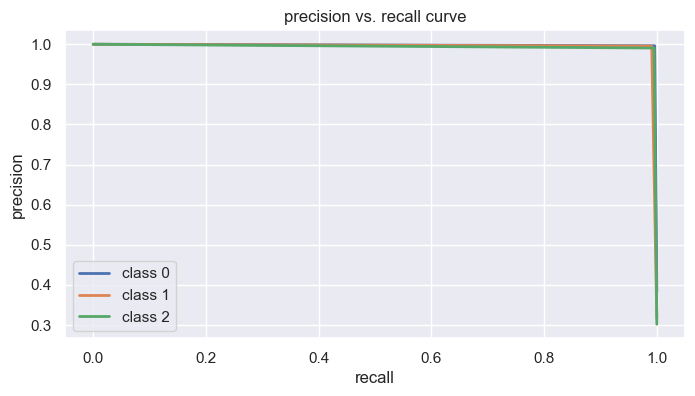

In [234]:
modeloRFC_Optimizado = DecisionTreeClassifier(#max_depth=gridRFC.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                   # min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline2x = Pipeline(steps=[('ct', CT),('m2',modeloRFC_Optimizado)])

pipeline2x.fit(X_train, y_train)

lr_probs2 = pipeline2x.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas


y_test_p = y_test.copy()
my_vals = y_test.unique().tolist()
my_vals.sort()


y_test = label_binarize(y_test, classes=my_vals)
n_classes = y_test.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], lr_probs2[:, i])
  average_precision[i] = average_precision_score(y_test[:, i], lr_probs2[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

Usamos como metrica Gmean